In [45]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [46]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as st


# Reflect Tables into SQLAlchemy ORM

In [47]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [48]:
engine = create_engine("sqlite:///hawaii.sqlite")
inspector=inspect(engine)

In [49]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [50]:
Base.classes.keys()

['measurement', 'station']

In [51]:
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [52]:
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [53]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [54]:
session = Session(engine)

In [55]:
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(most_recent.date)

2017-08-23


In [56]:
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year

datetime.date(2016, 8, 23)

In [67]:
one_year_precp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.prcp).\
    filter(Measurement.date <= dt.date(2017, 8, 23)).\
    filter(Measurement.date >= one_year).all()

# Exploratory Precipitation Analysis

In [68]:
prec_df = pd.DataFrame(one_year_precp)
prec_df_updated = prec_df.rename(columns={0: 'Date', 1: 'Precipitation'})

precipitation_df = prec_df_updated.sort_values(by='Date')
precipitation_df = precipitation_df.set_index('Date')

precipitation_df

,Precipitation
Date,
2016-08-23,1.79
2016-08-23,0.70
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-21,0.02
2017-08-21,0.56
2017-08-22,0.50


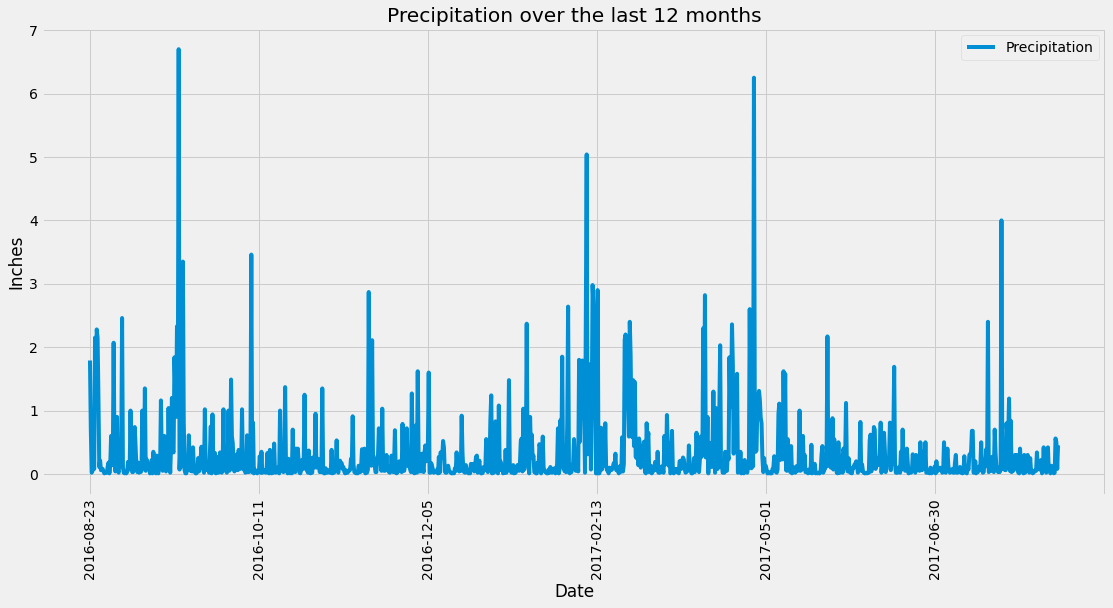

In [85]:
precipitation_df.plot.line(figsize=(10,8))
plt.xticks(rotation=90)
plt.title("Precipitation over the last 12 months")
plt.ylabel("Inches")
plt.savefig("../SQLAlchemy-Challenge/Images/precipitationgraph.png")
plt.show()


In [61]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# x = precipitation_df["Date"]
# y = precipitation_df["Precipitation"]

# correlation = st.pearsonr()
# print(f"The correlation between both factors is {round(correlation[0],2)}")

# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).group_by(Station.station).count()
print(total_stations)

9


In [63]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement).group_by(Measurement.station)
most_active_stations

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [66]:
# Close Session
session.close()